In [31]:
import csv
import os

In [32]:
def load_data(file_path):
    with open(file_path, newline='') as csvfile:
        csv_reader = csv.reader(csvfile)
        next(csv_reader) # skip the header
        data = [row for row in csv_reader]
    return data

In [33]:
def get_device_info(data, oem_id):
    device_info = {}
    for row in data:
        if row[0] == oem_id:
            device_info = {
                'model_name': row[2],
                'manufacturer': row[6],
                'weight': row[14],
                'price': row[15],
                'price_unit': row[16],
            }
    return device_info

In [34]:
# replace 'your_file_path' with the actual path to the 'device_features.csv' file
file_path = r'device_features.csv'
data = load_data(file_path)

# replace 'your_oem_id' with the actual oem_id for which you want to retrieve the device information
oem_id = 'PAYB0000JP'
device_info = get_device_info(data, oem_id)
print(device_info)

{'model_name': 'Moto G53j 5G 2023 Dual SIM TD-LTE JP 128GB XT2335-5', 'manufacturer': 'Lenovo', 'weight': '183', 'price': '34800', 'price_unit': 'JPY'}


a2. Retrieve the brand, model name, RAM capacity, market regions, and the date when the information was added for device(s) associated with a specified code name.

In [35]:
import pandas as pd

df= pd.read_csv(r'device_features.csv')

def retrieve_device_info_by_codename(dataframe, codename):
    # Filter the DataFrame based on the specified codename
    filtered_df = dataframe[dataframe['codename'] == codename]

    # Check if there are any devices with the specified codename
    if filtered_df.empty:
        print(f"No devices found with codename '{codename}'.")
        return None

    # Select the relevant columns for retrieval
    selected_columns = ['brand', 'model', 'ram_capacity', 'market_regions', 'info_added_date']

    # Retrieve and print the information for each device
    for index, row in filtered_df[selected_columns].iterrows():
        print(f"Device Information for Codename '{codename}':")
        print(f"Brand: {row['brand']}")
        print(f"Model: {row['model']}")
        print(f"RAM Capacity: {row['ram_capacity']} GB")
        print(f"Market Regions: {row['market_regions']}")
        print(f"Info Added Date: {row['info_added_date']}")
        print("-" * 40)

# Example usage: Retrieve information for devices with codename 'example_codename'
retrieve_device_info_by_codename(df, 'Samsung A135')


Device Information for Codename 'Samsung A135':
Brand: Samsung
Model: SM-A135U Galaxy A13 2022 Standard Edition TD-LTE US 32GB / SM-A135R4
RAM Capacity: 3 GB
Market Regions: North America
Info Added Date: 02-08-23 18:10
----------------------------------------
Device Information for Codename 'Samsung A135':
Brand: Samsung
Model: SM-A135U1/DS Galaxy A13 2022 Standard Edition Dual SIM TD-LTE US 32GB
RAM Capacity: 3 GB
Market Regions: North America
Info Added Date: 01-08-23 09:00
----------------------------------------
Device Information for Codename 'Samsung A135':
Brand: Samsung
Model: SM-A135U Galaxy A13 2022 Standard Edition TD-LTE US 32GB / SM-A135V
RAM Capacity: 3 GB
Market Regions: North America
Info Added Date: 31-07-23 23:26
----------------------------------------
Device Information for Codename 'Samsung A135':
Brand: Samsung
Model: SM-A135U Galaxy A13 2022 Standard Edition Dual SIM TD-LTE US 32GB / SM-A135T
RAM Capacity: 3 GB
Market Regions: North America
Info Added Date: 21-0

a3. Retrieve the oem_id, release date, announcement date, dimensions, and device category of the device(s) based on a specified RAM capacity.

In [36]:
def retrieve_device_info_by_ram_capacity(dataframe, ram_capacity):
    # Filter the DataFrame based on the specified RAM capacity
    filtered_df = dataframe[dataframe['ram_capacity'] == ram_capacity]

    # Check if there are any devices with the specified RAM capacity
    if filtered_df.empty:
        print(f"No devices found with RAM capacity '{ram_capacity}' GB.")
        return None

    # Select the relevant columns for retrieval
    selected_columns = ['oem_id', 'released_date', 'announced_date', 'dimensions', 'device_category']

    # Retrieve and print the information for each device
    for index, row in filtered_df[selected_columns].iterrows():
        print(f"Device Information for RAM Capacity '{ram_capacity}' GB:")
        print(f"OEM ID: {row['oem_id']}")
        print(f"Release Date: {row['released_date']}")
        print(f"Announcement Date: {row['announced_date']}")
        print(f"Dimensions: {row['dimensions']}")
        print(f"Device Category: {row['device_category']}")
        print("-" * 40)

# Example usage: Retrieve information for devices with RAM capacity 8 GB
retrieve_device_info_by_ram_capacity(df, 8)

Device Information for RAM Capacity '8' GB:
OEM ID: PAYB0000JP
Release Date: 16-06-23
Announcement Date: 01-05-23
Dimensions: 2.94x6.41x0.32 inches
Device Category: Smartphone
----------------------------------------
Device Information for RAM Capacity '8' GB:
OEM ID: MZB0EPOIN
Release Date: 09-05-23
Announcement Date: 01-04-23
Dimensions: 2.95x6.34x0.31 inches
Device Category: Smartphone
----------------------------------------
Device Information for RAM Capacity '8' GB:
OEM ID: MZB0DD2IN
Release Date: 06-01-23
Announcement Date: 01-12-22
Dimensions: 2.99x6.41x0.31 inches
Device Category: Smartphone
----------------------------------------
Device Information for RAM Capacity '8' GB:
OEM ID: MZB0DD1IN
Release Date: 06-01-23
Announcement Date: 01-12-22
Dimensions: 2.99x6.41x0.31 inches
Device Category: Smartphone
----------------------------------------
Device Information for RAM Capacity '8' GB:
OEM ID: AI2205_A
Release Date: 01-04-23
Announcement Date: 13-04-23
Dimensions: 3.03x6.81x0

a4. Retrieve information from your chosen columns and apply a specific condition that relates to an individual device. Please select at least three columns and one condition that differs from previous requirements.

In [37]:
def retrieve_device_info_by_condition(dataframe, condition_value):
    # Filter the DataFrame based on the specified condition
    filtered_df = dataframe[dataframe['display_refresh_rate'] > condition_value]

    # Check if there are any devices satisfying the condition
    if filtered_df.empty:
        print(f"No devices found with a display refresh rate greater than {condition_value} Hz.")
        return None

    # Select the relevant columns for retrieval
    selected_columns = ['brand', 'model', 'display_refresh_rate']

    # Retrieve and print the information for each device
    for index, row in filtered_df[selected_columns].iterrows():
        print(f"Device Information with Display Refresh Rate > {condition_value} Hz:")
        print(f"Brand: {row['brand']}")
        print(f"Model: {row['model']}")
        print(f"Display Refresh Rate: {row['display_refresh_rate']} Hz")
        print("-" * 40)

# Example usage: Retrieve information for devices with a display refresh rate greater than 90 Hz
retrieve_device_info_by_condition(df, 90)

Device Information with Display Refresh Rate > 90 Hz:
Brand: Motorola
Model: Moto G53j 5G 2023 Dual SIM TD-LTE JP 128GB XT2335-5
Display Refresh Rate: 120 Hz
----------------------------------------
Device Information with Display Refresh Rate > 90 Hz:
Brand: Motorola
Model: Moto G53 5G 2022 Premium Edition TD-LTE LATAM 128GB XT2335-1
Display Refresh Rate: 120 Hz
----------------------------------------
Device Information with Display Refresh Rate > 90 Hz:
Brand: Motorola
Model: Moto G53 5G 2022 Standard Edition Dual SIM TD-LTE LATAM 128GB XT2335-1
Display Refresh Rate: 120 Hz
----------------------------------------
Device Information with Display Refresh Rate > 90 Hz:
Brand: Motorola
Model: Moto G53 5G 2022 Standard Edition Global Dual SIM TD-LTE 128GB XT2335-2
Display Refresh Rate: 120 Hz
----------------------------------------
Device Information with Display Refresh Rate > 90 Hz:
Brand: Xiaomi
Model: Poco F5 Pro 5G Premium Edition Global Dual SIM TD-LTE 512GB 23013RK75G
Display Re

#### b) The system will allow the user to analyse/query data using the pandas module to perform the following:
- Load data from a CSV file into memory using the pandas module. Use the file path received
from task a) for this purpose. After loading the data, proceed with the following tasks.
b1. Identify the top 5 regions where a specific brand of devices was sold.

In [38]:
def top_regions_for_brand(dataframe, brand_name):
    # Filter the DataFrame for the specified brand
    brand_df = dataframe[dataframe['brand'] == brand_name]

    # Group by 'market_regions' and count the number of devices sold in each region
    region_counts = brand_df['market_regions'].value_counts()

    # Select the top 5 regions
    top_5_regions = region_counts.head(5)

    # Print the results
    print(f"Top 5 regions where {brand_name} devices were sold:")
    print(top_5_regions)

# Example usage: Identify the top 5 regions for a specific brand (e.g., 'Samsung')
top_regions_for_brand(df, 'Samsung')

Top 5 regions where Samsung devices were sold:
market_regions
North America                                                                                                                                          275
Asia                                                                                                                                                   101
Asia,Southeast Asia                                                                                                                                     52
Africa,Asia,Australia,Central America,Eastern Europe,Europe,Middle East,North America,Oceania,South America,Southeast Asia,Western Europe,Worldwide     11
North America,South America                                                                                                                              9
Name: count, dtype: int64


### b2. Analyse the average price of devices within a specific brand, all in the same currency.

In [39]:
df= pd.read_csv(r'device_features.csv')

def average_price_for_brand(dataframe, brand_name):
    # Filter the DataFrame for the specified brand
    brand_df = dataframe[dataframe['brand'] == brand_name]

    # Calculate the average price for the brand
    average_price = brand_df['price'].mean()

    # Print the result
    print(f"Average price of {brand_name} devices: {average_price:.2f} {brand_df['price_currency'].iloc[0]}")

# Example usage: Analyze the average price for a specific brand (e.g., 'Samsung')
average_price_for_brand(df, 'Samsung')

Average price of Samsung devices: 199633.85 USD


#### b3. Analyse the average mass for each manufacturer and display the list of average mass for all manufacturers.

In [40]:
def average_mass_for_manufacturers(dataframe):
    # Group by 'manufacturer' and calculate the average mass for each manufacturer
    avg_mass_by_manufacturer = dataframe.groupby('manufacturer')['weight_gram'].mean()

    # Print the result
    print("Average mass for each manufacturer:")
    print(avg_mass_by_manufacturer)

# Example usage: Analyze the average mass for each manufacturer
average_mass_for_manufacturers(df)

Average mass for each manufacturer:
manufacturer
ASUSTeK Computer                    221.367347
BBK Electronics                     201.000000
FIH Precision Electronics           203.750000
Foxconn                             315.147975
Hon Hai Precision                   144.000000
LG Electronics                      204.075000
Lenovo                              216.975904
Luxshare iTech                       31.605000
Microsoft                           284.000000
Rising Stars Mobile India           196.500000
Samsung Electronics                 205.644040
Sharp                               209.500000
Shenzhen TINNO Mobile Technology    198.840000
Sony                                189.363636
Wingtech Mobile                     204.500000
Xiaomi                              190.545455
ZTE                                 195.500000
Name: weight_gram, dtype: float64


#### b4. Analyse the data to derive meaningful insights based on your unique selection, distinct from the previous requirements.

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

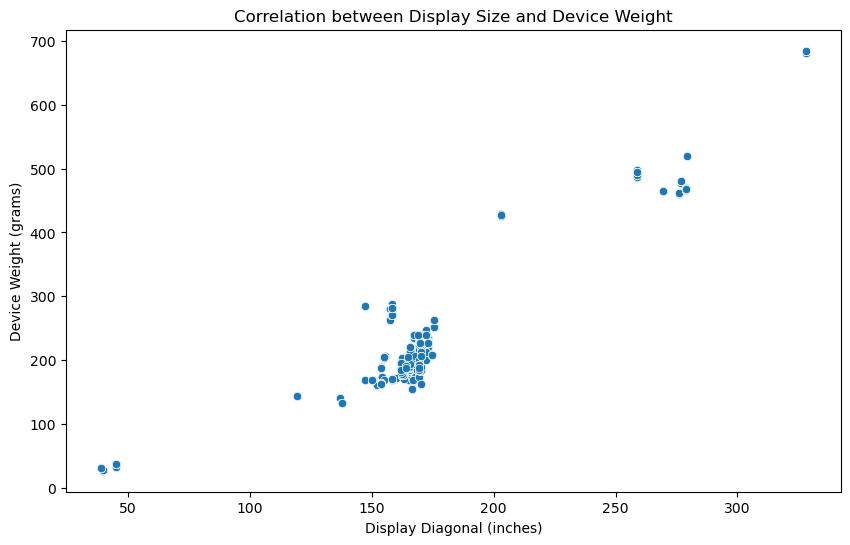

Correlation Coefficient: 0.95


In [42]:
def analyze_display_size_vs_weight(dataframe):
    # Filter out rows with missing values in either display diagonal or weight
    filtered_df = dataframe.dropna(subset=['display_diagonal', 'weight_gram'])

    # Plot a scatter plot to visualize the correlation
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='display_diagonal', y='weight_gram', data=filtered_df)
    plt.title('Correlation between Display Size and Device Weight')
    plt.xlabel('Display Diagonal (inches)')
    plt.ylabel('Device Weight (grams)')
    plt.show()

    # Calculate the correlation coefficient
    correlation_coefficient = filtered_df['display_diagonal'].corr(filtered_df['weight_gram'])
    print(f"Correlation Coefficient: {correlation_coefficient:.2f}")

# Example usage: Analyze the correlation between display size and device weight
analyze_display_size_vs_weight(df)

#### c) The system will allow the user to visualise the data using the matplotlib module as follows:
- Load data from a CSV file into memory. Use the file path received from task a) for this purpose.
After loading the data, proceed with the following tasks.
c1. Create a chart to visually represent the proportion of RAM types for devices in the
current market.

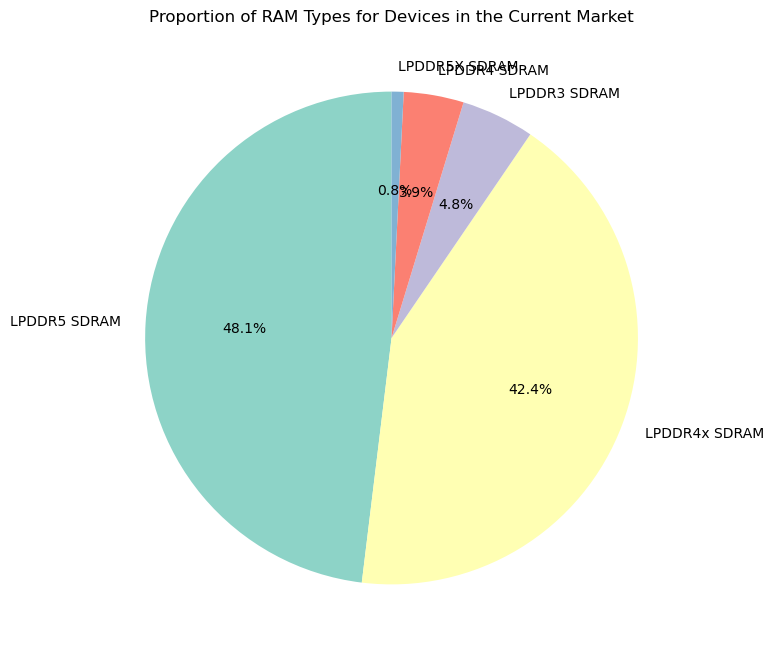

In [43]:

def plot_ram_proportion(dataframe):
    # Group by 'ram_type' and count the occurrences
    ram_counts = dataframe['ram_type'].value_counts()

    # Plot a pie chart to represent the proportion of RAM types
    plt.figure(figsize=(8, 8))
    plt.pie(ram_counts, labels=ram_counts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Set3.colors)
    plt.title('Proportion of RAM Types for Devices in the Current Market')
    plt.show()

# Example usage: Create a chart for the proportion of RAM types
plot_ram_proportion(df)

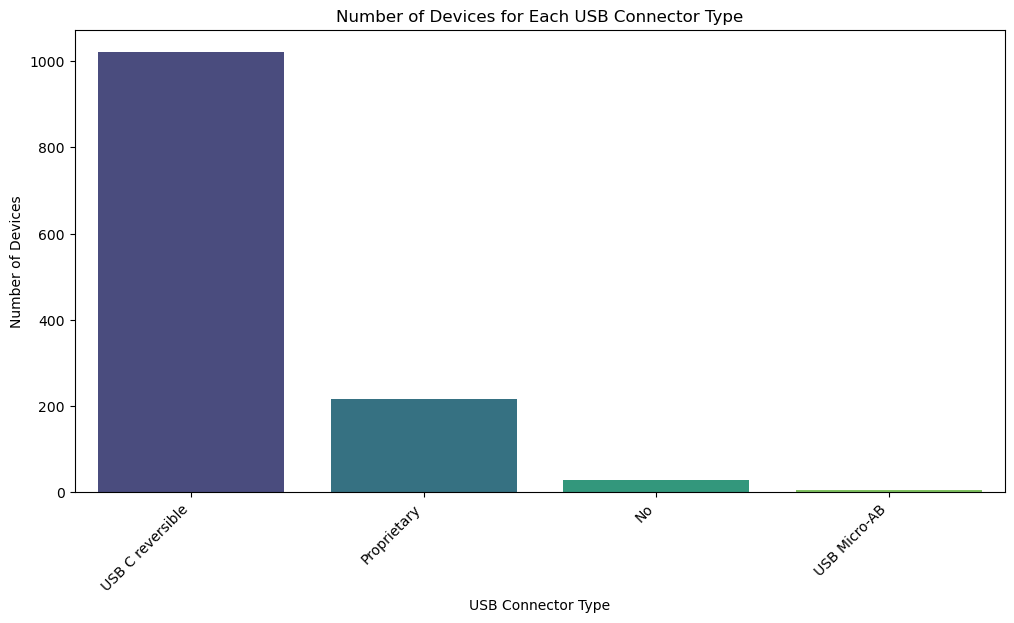

In [44]:
def plot_usb_connector_comparison(dataframe):
    # Count the number of devices for each USB connector type
    usb_counts = dataframe['usb_connector'].value_counts()

    # Plot a bar chart to compare the number of devices for each USB connector type
    plt.figure(figsize=(12, 6))
    sns.barplot(x=usb_counts.index, y=usb_counts, palette='viridis')
    plt.title('Number of Devices for Each USB Connector Type')
    plt.xlabel('USB Connector Type')
    plt.ylabel('Number of Devices')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
    plt.show()

# Example usage: Create a chart to compare the number of devices for each USB connector type
plot_usb_connector_comparison(df)

#### c3. Create separate charts illustrating the monthly average price trends (in GBP) for devices released in each year from 2020 to 2023. Each chart should focus on a specific year.

C:\Users\Acer\AppData\Local\Temp\ipykernel_13080\286986092.py:14: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['year'] = pd.to_datetime(data['released_date']).dt.year
C:\Users\Acer\AppData\Local\Temp\ipykernel_13080\286986092.py:21: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  monthly_avg_price = year_data.groupby(pd.to_datetime(year_data['released_date']).dt.month)['price_gbp'].mean()


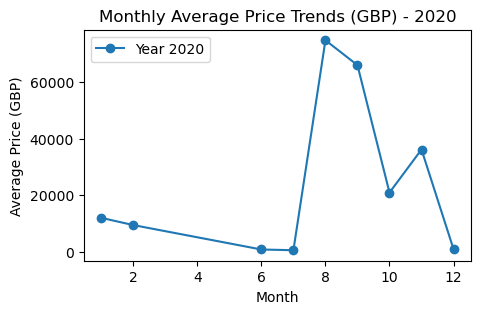

C:\Users\Acer\AppData\Local\Temp\ipykernel_13080\286986092.py:21: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  monthly_avg_price = year_data.groupby(pd.to_datetime(year_data['released_date']).dt.month)['price_gbp'].mean()


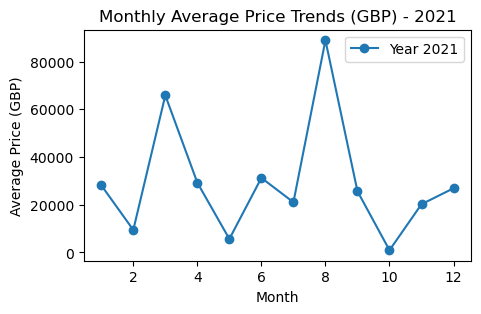

C:\Users\Acer\AppData\Local\Temp\ipykernel_13080\286986092.py:21: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  monthly_avg_price = year_data.groupby(pd.to_datetime(year_data['released_date']).dt.month)['price_gbp'].mean()


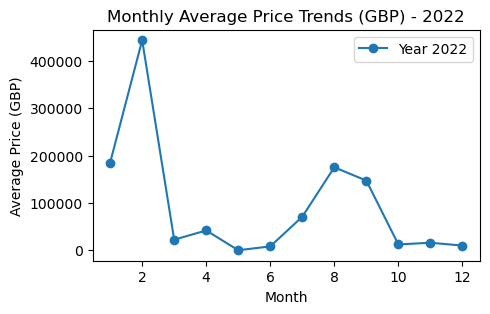

C:\Users\Acer\AppData\Local\Temp\ipykernel_13080\286986092.py:21: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  monthly_avg_price = year_data.groupby(pd.to_datetime(year_data['released_date']).dt.month)['price_gbp'].mean()


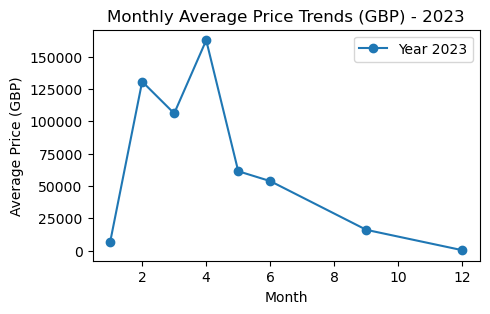

In [45]:
# Function to convert price to GBP if not already in GBP
def convert_to_gbp(row):
    if row['price_currency'] != 'GBP':
        # Assuming a conversion factor (adjust as needed)
        return row['price'] * 0.85
    return row['price']

# Function to create a chart for the monthly average price trends for each year
def create_price_trends_charts(data):
    # Convert prices to GBP if not already in GBP
    data['price_gbp'] = data.apply(convert_to_gbp, axis=1)

    # Extract the year from the 'released_date' column
    data['year'] = pd.to_datetime(data['released_date']).dt.year

    # Filter data for the years 2020 to 2023
    for year in range(2020, 2024):
        year_data = data[data['year'] == year]

        # Group data by month and calculate the average price for each month
        monthly_avg_price = year_data.groupby(pd.to_datetime(year_data['released_date']).dt.month)['price_gbp'].mean()

        # Plotting
        plt.figure(figsize=(5, 3))
        plt.plot(monthly_avg_price.index, monthly_avg_price.values, marker='o', label=f'Year {year}')
        plt.title(f'Monthly Average Price Trends (GBP) - {year}')
        plt.xlabel('Month')
        plt.ylabel('Average Price (GBP)')
        plt.legend()
        plt.show()

# Main function
def main():
    # Assuming 'df' is your DataFrame
    df_data = df.copy()

    # Create charts for the monthly average price trends for each year
    create_price_trends_charts(df_data)

if __name__ == "__main__":
    main()

#### c4. Create a visualisation of your selection to showcase information related to device features that can reveal trends, behaviours, or patterns, ensuring it is distinct from previous requirements.

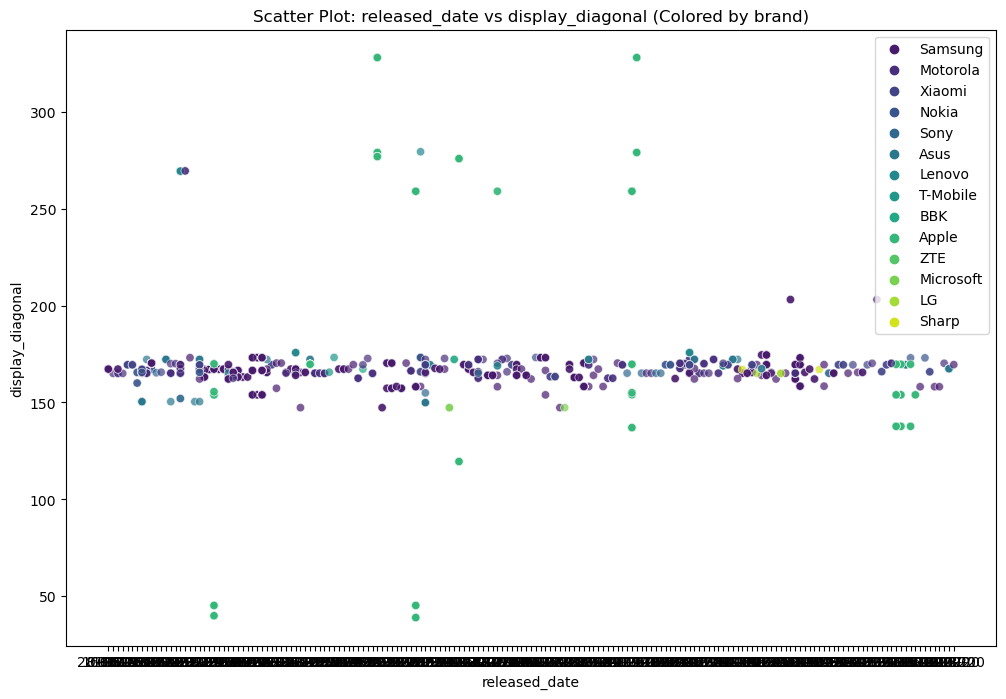

In [46]:
# Function to create a scatter plot for device features
def create_device_features_scatter(dataframe, x_feature, y_feature, hue_feature):
    plt.figure(figsize=(12, 8))
    sns.scatterplot(x=x_feature, y=y_feature, hue=hue_feature, data=dataframe, palette='viridis', alpha=0.7)
    plt.title(f'Scatter Plot: {x_feature} vs {y_feature} (Colored by {hue_feature})')
    plt.xlabel(x_feature)
    plt.ylabel(y_feature)
    plt.legend()
    plt.show()

# Example usage: Create a scatter plot for release year vs display size (colored by brand)
create_device_features_scatter(df, 'released_date', 'display_diagonal', 'brand')